In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

Load data, should be placed in folder called 'Data'

In [2]:
df_0 = pd.read_csv("../data/Training_Set_Values.csv")
df_1 = pd.read_csv("../data/Training_Set_labels.csv")
df = df_0.merge(df_1, on='id')
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(lambda x: x.lower() if isinstance(x, str) else x)

df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,roman,1390,roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,grumeti,1399,grumeti,34.698766,-2.147466,zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,lottery club,686,world vision,37.460664,-3.821329,kwa mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,unicef,263,unicef,38.486161,-11.155298,zahanati ya nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,action in a,0,artisan,31.130847,-1.825359,shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,germany republi,1210,ces,37.169807,-3.253847,area three namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,cefa-njombe,1212,cefa,35.249991,-9.070629,kwa yahona kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,malec,0,musa,35.861315,-6.378573,mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


Starting with a simple look at data, see how many NaNs? Which columns containing NaNs? With this information, plan an approach to handle the missing values.

Which column contains NaN? Corrosponding to which id?

In [ ]:
nan_locs = np.where(df.isna())

for row, col in zip(*nan_locs):
    row_id = df.iloc[row]["id"]
    col_name = df.columns[col]
    print(f"NaN found in row with id {row_id}, column '{col_name}'")

What are the columns containing NaNs?

In [56]:
cols_with_nan = df.columns[df.isna().any()].tolist()
print(cols_with_nan)

['public_meeting']


Okay, these 8 columns: How are they related to the target variable? Can these be fixed and used for training the ML model?

In [ ]:
for col in df:
    if df[col].dtype == 'object':
        print(f"\nColumn: {col}")
        print("Value Counts:")
        print(df[col].value_counts(dropna=True))
        print(f"Number of NaNs: {df[col].isna().sum()}")


In [57]:
df


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,other,1390,other,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,other,1399,other,34.698766,-2.147466,zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,other,686,other,37.460664,-3.821329,kwa mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,unicef,263,other,38.486161,-11.155298,zahanati ya nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,other,0,other,31.130847,-1.825359,shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,germany republi,1210,other,37.169807,-3.253847,area three namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,other,1212,other,35.249991,-9.070629,kwa yahona kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,other,0,other,34.017087,-8.750434,mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,other,0,other,35.861315,-6.378573,mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [ ]:
pd.crosstab(df['ward'], df['region_code'])

In [ ]:
pd.crosstab(df['region_code'], df['region'])


In [ ]:
### print(df.columns.tolist())


In [ ]:
geo_cols = ['gps_height', 'longitude', 'latitude', 'basin', 'region', 'region_code',
            'district_code', 'lga', 'ward', 'subvillage']

geo_df = df[geo_cols].copy()


In [ ]:
geo_df

Checking the columns source, source_type and source_class

source_type is redundant, repeats information from source class.

In [ ]:
df.groupby(['source', 'source_type'])['source_class'].value_counts().unstack().fillna(0)


same as previous cell. waterpoint_type offers more information about "communal standpipe" and "communal standpipe multiple". Otherwise its same information in two coulmns, so drop the column waterpoint_type_group.

In [ ]:
df.groupby(['waterpoint_type'])['waterpoint_type_group'].value_counts().unstack().fillna(0)

Similar imformation. water_quality offers slightly extra information about abandoned waterpoints. quality_group combines this information into salty and fluoride.

In [ ]:
df.groupby(['water_quality'])['quality_group'].value_counts().unstack().fillna(0)

drop quantity_group

In [ ]:
df.groupby(['quantity'])['quantity_group'].value_counts().unstack().fillna(0)

In the case of extraction_type, perhaps extraction_type_class offers enough information about the extraction type? HOw useful is the information about the brand of the motor pumps?

In [ ]:
pd.crosstab(
    index=[df['extraction_type'], df['extraction_type_group']],
    columns=df['extraction_type_class']
)


In [ ]:
df['subvillage'].isna().sum()


****START FILLING HERE

In [3]:
# 1. Replace blank strings with NaN
df['subvillage'] = df['subvillage'].replace('', pd.NA)

# 2. Function to fill NaN with fallback hierarchy
def fill_subvillage(row):
    if pd.isna(row['subvillage']):
        ward_mode = df[df['ward'] == row['ward']]['subvillage'].mode()
        if not ward_mode.empty:
            return ward_mode[0]

        lga_mode = df[df['lga'] == row['lga']]['subvillage'].mode()
        if not lga_mode.empty:
            return lga_mode[0]

        region_mode = df[df['district_code'] == row['district_code']]['subvillage'].mode()
        if not region_mode.empty:
            return region_mode[0]

        return 'unknown'

    return row['subvillage']

# 3. Apply the function
df['subvillage'] = df.apply(fill_subvillage, axis=1)


In [ ]:
df.groupby('region')['lga'].nunique().sort_values(ascending=False)

# For each level, count how many unique values exist per parent group
print("Districts per Region:")
print(df.groupby('region')['district_code'].nunique())

print("\nLGAs per District:")
print(df.groupby('district_code')['lga'].nunique())

print("\nWards per LGA:")
print(df.groupby('lga')['ward'].nunique())

print("\nSubvillages per Ward:")
print(df.groupby('ward')['subvillage'].nunique())


In [ ]:
df.groupby(['region'])['region_code'].value_counts().unstack().fillna(0)
grouped = df.groupby(['region'])['region_code'].nunique().reset_index()
grouped = grouped.rename(columns={'region_code': 'n_unique_region_code'})
print(grouped.sort_values('n_unique_region_code', ascending=False))


Trying to fix the missing geo coordinates, by averaging location of known wards, then assigning these, if the entries with missing geo coordinates fall into same ward.

In [4]:
df['latitude'] = df['latitude'].apply(lambda x: pd.NA if abs(x) < 1e-6 else x)
df['longitude'] = df['longitude'].apply(lambda x: pd.NA if abs(x) < 1e-6 else x)


In [5]:
geo_fallback_order = ['subvillage', 'ward', 'lga', 'district_code', 'region_code']

def fill_missing_geo(df, group_cols):
    for col in group_cols:
        # Compute group-wise means (excluding missing lat/lon)
        group_means = df.dropna(subset=['latitude', 'longitude']).groupby(col)[['latitude', 'longitude']].mean()

        def fill(row):
            if pd.isna(row['latitude']) or pd.isna(row['longitude']):
                key = row[col]
                if key in group_means.index:
                    if pd.isna(row['latitude']):
                        row['latitude'] = group_means.loc[key, 'latitude']
                    if pd.isna(row['longitude']):
                        row['longitude'] = group_means.loc[key, 'longitude']
            return row

        df = df.apply(fill, axis=1)

        # Stop early if no more NaNs
        if df['latitude'].isna().sum() == 0 and df['longitude'].isna().sum() == 0:
            break

    return df

df = fill_missing_geo(df, geo_fallback_order)


In [10]:
# Step 1: Compute group-wise means for latitude and longitude
geo_means = df.dropna(subset=['latitude', 'longitude']).groupby('subvillage')[['latitude', 'longitude']].median()

# Step 2: Function to fill missing lat/lon using 'subvillage' only
def fill_lat_lon_by_subvillage(row):
    if pd.isna(row['latitude']) or pd.isna(row['longitude']):
        key = row['subvillage']
        if key in geo_means.index:
            if pd.isna(row['latitude']):
                row['latitude'] = geo_means.loc[key, 'latitude']
            if pd.isna(row['longitude']):
                row['longitude'] = geo_means.loc[key, 'longitude']
    return row

# Step 3: Apply it row-wise
before_lat = df['latitude'].isna().sum()
before_lon = df['longitude'].isna().sum()

df = df.apply(fill_lat_lon_by_subvillage, axis=1)

after_lat = df['latitude'].isna().sum()
after_lon = df['longitude'].isna().sum()

print(f"✅ Filled {before_lat - after_lat} missing latitudes using 'subvillage'")
print(f"✅ Filled {before_lon - after_lon} missing longitudes using 'subvillage'")


✅ Filled 670 missing latitudes using 'subvillage'
✅ Filled 670 missing longitudes using 'subvillage'


In [8]:
print("Still missing latitude:", df['latitude'].isna().sum())
print("Still missing longitude:", df['longitude'].isna().sum())


Still missing latitude: 0
Still missing longitude: 0


In [6]:
# 1. Convert suspicious population values to NaN
df['population'] = df['population'].apply(lambda x: pd.NA if x in [0, 1] else x)

# 2. Define fallback order from most local to most general
fallback_order = ['subvillage','ward', 'lga', 'district_code', 'region_code']

# 3. Imputation function using median per group
def fill_missing_population(df, levels):
    for level in levels:
        # Calculate median population per group (excluding missing)
        group_medians = df.dropna(subset=['population']).groupby(level)['population'].median()

        def fill(row):
            if pd.isna(row['population']):
                key = row[level]
                if key in group_medians:
                    row['population'] = group_medians.loc[key]
            return row

        df = df.apply(fill, axis=1)

        # Exit early if all values are filled
        if df['population'].isna().sum() == 0:
            break

    return df

# 4. Apply the imputation
df = fill_missing_population(df, fallback_order)

# Optional: Check remaining NaNs
print("Remaining missing population values:", df['population'].isna().sum())

Remaining missing population values: 0


In [7]:
def geo_groupwise_fill(df, target_col, group_cols):
    for col in group_cols:
        group_medians = df.dropna(subset=[target_col]).groupby(col)[target_col].median()

        def fill(row):
            if pd.isna(row[target_col]):
                key = row[col]
                if key in group_medians.index:
                    row[target_col] = group_medians.loc[key]
            return row

        df = df.apply(fill, axis=1)

        if df[target_col].isna().sum() == 0:
            break

    return df


In [8]:
geo_cols = ['subvillage', 'ward', 'lga', 'district_code', 'region_code']
df = geo_groupwise_fill(df, 'gps_height', geo_cols)
df = geo_groupwise_fill(df, 'construction_year', geo_cols)


This eliminates the 0s and NaNs, and instead fills in estimated/average/mean location based on ward, lga, subvillage or region.

In [ ]:
import plotly.express as px

fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     hover_name='id',  # or any other column
                     scope='africa')  # assuming this is Tanzania

fig.show()


Now trying to handle missing (0 and 1) values fopr population feature.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df[df['population'] > 0]['population'], bins=100, kde=True)
plt.title("Distribution of Population (excluding 0)")
plt.xlabel("Population")
plt.ylabel("Count")
plt.xlim(0, 1000)  # Optional: focus on lower range for better visibility
plt.show()


In [ ]:
from scipy.stats import skew

pop_skew = skew(df[df['population'] > 0]['population'])
print("Skewness:", pop_skew)


In [ ]:
pop_vals = df[df['population'] > 0]['population']
print("Mean:", pop_vals.mean())
print("Median:", pop_vals.median())


Same logic as before (latitude/longitude) to fill in the missing values. However, since data is skewed to one side, consider imputing with median instead of mean.

In [41]:
import pandas as pd

# 1. Convert suspicious population values to NaN
df['population'] = df['population'].apply(lambda x: pd.NA if x in [0, 1] else x)

# 2. Define fallback order from most local to most general
fallback_order = ['subvillage','ward', 'lga', 'district_code', 'region']

# 3. Imputation function using median per group
def fill_missing_population(df, levels):
    for level in levels:
        # Calculate median population per group (excluding missing)
        group_medians = df.dropna(subset=['population']).groupby(level)['population'].median()

        def fill(row):
            if pd.isna(row['population']):
                key = row[level]
                if key in group_medians:
                    row['population'] = group_medians.loc[key]
            return row

        df = df.apply(fill, axis=1)

        # Exit early if all values are filled
        if df['population'].isna().sum() == 0:
            break

    return df

# 4. Apply the imputation
df = fill_missing_population(df, fallback_order)

# Optional: Check remaining NaNs
print("Remaining missing population values:", df['population'].isna().sum())


Remaining missing population values: 0


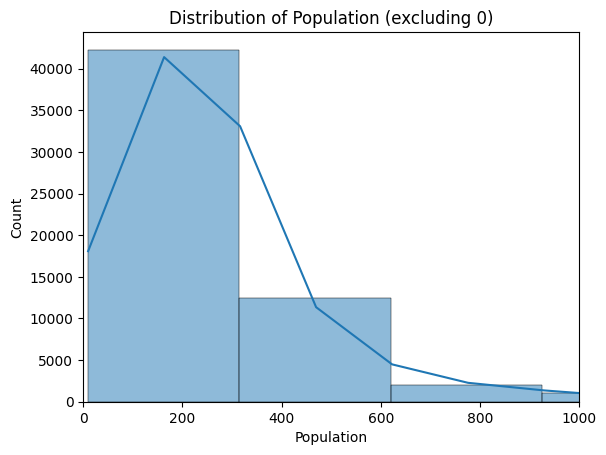

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df[df['population'] > 0]['population'], bins=100, kde=True)
plt.title("Distribution of Population (excluding 0)")
plt.xlabel("Population")
plt.ylabel("Count")
plt.xlim(0, 1000)  # Optional: focus on lower range for better visibility
plt.show()


There are still some entries with small value for population 

In [72]:
# Find rows where population is 0
population_zero_df = df[df['population'] == 5]

# Display how many such rows there are
print("Number of rows with population == 0:", population_zero_df.shape[0])

# Optional: display first few rows
print(population_zero_df.head())


Number of rows with population == 0: 0
Empty DataFrame
Columns: [id, amount_tsh, date_recorded, funder, gps_height, installer, longitude, latitude, wpt_name, num_private, basin, subvillage, region, region_code, district_code, lga, ward, population, public_meeting, recorded_by, scheme_management, scheme_name, permit, construction_year, extraction_type, extraction_type_group, extraction_type_class, management, management_group, payment, payment_type, water_quality, quality_group, quantity, quantity_group, source, source_type, source_class, waterpoint_type, waterpoint_type_group, status_group]
Index: []

[0 rows x 41 columns]


In [9]:
df['wpt_name'] = df['wpt_name'].fillna('none')


**** MANAGEMENT RELATED COLUMNS: Consider top commonly occuring valus, dump rest into OTHER.

Impute scheme_management with "other" instead of NaN

In [10]:
df['scheme_management'] = df['scheme_management'].fillna('other')

Columns with High cardinality, lets handle them by keeping the values that together make up the top 50% of the dataset, and label the rest as "other".

In [11]:
def relabel_by_coverage(df, column, threshold=0.5, new_label='other'):
    """
    Keep only the categories in `column` that cumulatively make up `threshold` (e.g., 0.5 for 50%) of rows.
    Others are relabeled as `new_label`.
    """
    # Get value counts and cumulative percentage
    value_counts = df[column].value_counts(normalize=True)
    cumulative = value_counts.cumsum()

    # Categories to keep: top ones covering up to the threshold
    keep_labels = cumulative[cumulative <= threshold].index.tolist()

    # Apply relabeling
    df[column] = df[column].apply(lambda x: x if x in keep_labels else new_label)

    return df


In [12]:
df = relabel_by_coverage(df, 'funder', threshold=0.5)
df = relabel_by_coverage(df, 'installer', threshold=0.5)
df = relabel_by_coverage(df, 'scheme_name', threshold=0.5)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Select features
features = ['management', 'scheme_management', 'scheme_name','payment', 'population','basin','funder','installer']
df_model = df[features + ['permit']].copy()

# Step 2: One-hot encode categorical features
df_model = pd.get_dummies(df_model, columns=features, drop_first=True)

# Step 3: Separate known and unknown permit rows
df_known = df_model[df_model['permit'].notna()]
df_unknown = df_model[df_model['permit'].isna()]

# Step 4: Train/test split on known data
X = df_known.drop(columns='permit')
y = df_known['permit'].astype(bool)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

# Step 5: Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Evaluate model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on known data: {accuracy:.4f}")

# Step 7: If accuracy is acceptable, predict missing permit values
if accuracy > 0.8:  # or your own threshold
    X_missing = df_unknown.drop(columns='permit')
    predicted_permit = clf.predict(X_missing)
    df.loc[df['permit'].isna(), 'permit'] = predicted_permit
    print("✅ Missing permit values filled using model.")
else:
    print("⚠️ Accuracy too low. Consider another method or more features.")


Accuracy on known data: 0.9103
✅ Missing permit values filled using model.


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Select features
features = ['management', 'scheme_management', 'scheme_name','payment', 'population','basin','funder','installer','permit']
df_model = df[features + ['public_meeting']].copy()

# Step 2: One-hot encode categorical features
df_model = pd.get_dummies(df_model, columns=features, drop_first=True)

# Step 3: Separate known and unknown permit rows
df_known = df_model[df_model['public_meeting'].notna()]
df_unknown = df_model[df_model['public_meeting'].isna()]

# Step 4: Train/test split on known data
X = df_known.drop(columns='public_meeting')
y = df_known['public_meeting'].astype(bool)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

# Step 5: Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Evaluate model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on known data: {accuracy:.4f}")

# Step 7: If accuracy is acceptable, predict missing permit values
if accuracy > 0.8:  # or your own threshold
    X_missing = df_unknown.drop(columns='public_meeting')
    predicted_permit = clf.predict(X_missing)
    df.loc[df['public_meeting'].isna(), 'public_meeting'] = predicted_permit
    print("✅ Missing permit values filled using model.")
else:
    print("⚠️ Accuracy too low. Consider another method or more features.")


Accuracy on known data: 0.9534
✅ Missing permit values filled using model.


/tmp/ipykernel_10042/813614257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status_group', palette='Set2')


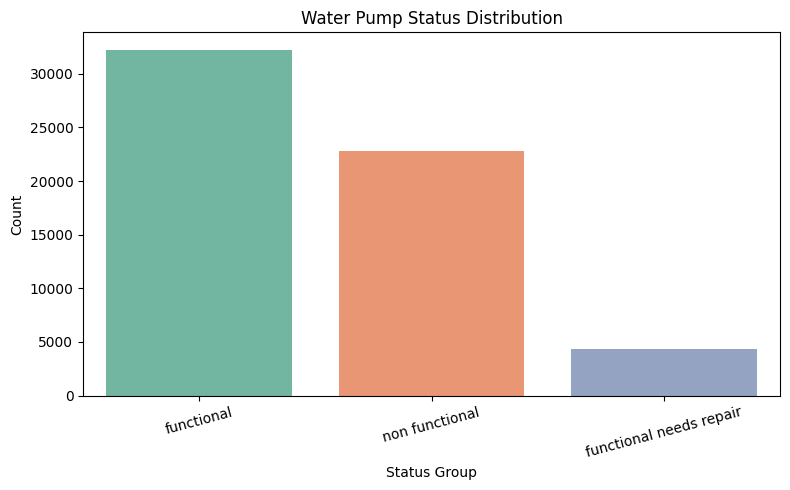

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status_group', palette='Set2')

plt.title("Water Pump Status Distribution")
plt.xlabel("Status Group")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Trying to trian a classifier with some selection of features. Just to see if the choice of features gives somewhat accurate prediction?

In [87]:
columns_to_keep = [
    'id','amount_tsh','date_recorded','funder','gps_height','installer','wpt_name', 'longitude', 'latitude', 'basin', 'region', 'region_code',
    'district_code', 'lga', 'ward','subvillage', 'population', 'source_type',
    'waterpoint_type_group', 'quality_group', 'quantity','public_meeting','scheme_name','permit','construction_year',
    'extraction_type_class', 'management', 'scheme_management','payment_type', 'status_group'
]

df_final = df[columns_to_keep].copy()
df_final

,id,amount_tsh,date_recorded,funder,gps_height,installer,wpt_name,longitude,latitude,basin,...,quantity,public_meeting,scheme_name,permit,construction_year,extraction_type_class,management,scheme_management,payment_type,status_group
0,69572,6000.0,2011-03-14,other,1390.0,other,none,34.938093,-9.856322,lake nyasa,...,enough,True,roman,False,1999.0,gravity,vwc,vwc,annually,functional
1,8776,250.0,2013-03-06,other,1399.0,other,zahanati,34.698766,-2.147466,lake victoria,...,insufficient,True,other,True,2010.0,gravity,wug,other,never pay,functional
2,34310,25.0,2013-02-25,other,686.0,other,kwa mahundi,37.460664,-3.821329,pangani,...,enough,True,other,True,2009.0,gravity,vwc,vwc,per bucket,functional
3,67743,50.0,2013-01-28,unicef,263.0,other,zahanati ya nanyumbu,38.486161,-11.155298,ruvuma / southern coast,...,dry,True,other,True,1986.0,submersible,vwc,vwc,never pay,non functional
4,19728,500.0,2011-07-13,other,1300.0,other,shuleni,31.130847,-1.825359,lake victoria,...,seasonal,True,other,True,1997.0,gravity,other,other,never pay,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,germany republi,1210.0,other,area three namba 27,37.169807,-3.253847,pangani,...,enough,True,losaa kia water supply,True,1999.0,gravity,water board,water board,per bucket,functional
59396,27263,4700.0,2011-05-07,other,1212.0,other,kwa yahona kuvala,35.249991,-9.070629,rufiji,...,enough,True,other,True,1996.0,gravity,vwc,vwc,annually,functional
59397,37057,500.0,2011-04-11,other,829.5,other,mashine,34.017087,-8.750434,rufiji,...,enough,True,other,False,1998.0,handpump,vwc,vwc,monthly,functional
59398,31282,50.0,2011-03-08,other,389.0,other,mshoro,35.861315,-6.378573,rufiji,...,insufficient,True,other,True,2009.0,handpump,vwc,vwc,never pay,functional


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separate features and target
X = df_final.drop(columns=['status_group'])  # replace with actual target column
y = df_final['status_group']

# Detect types
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()


In [89]:
# Numeric pipeline
num_transformer = StandardScaler()

# Categorical pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Full preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])


In [90]:
from sklearn.ensemble import RandomForestClassifier  # <-- change this import

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # <-- change this line
])


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['id', 'amount_tsh',
                                                   'gps_height', 'longitude',
                                                   'latitude', 'region_code',
                                                   'district_code',
                                                   'population',
                                                   'construction_year']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['date_recorded', 'funder',
                                                   'installer', 'wpt_name',
                                                   'basin', 'region', 'lga',
                                                   'ward', 'subvillage',
                                                   'source_type',
                                                   'waterpoint_type_group',
                                                   'quality_group', 'quantity',
                                                   'public_meeting',
                                                   'scheme_name', 'permit',
                                                   'extraction_type_class',
                                                   'management',
                                                   'scheme_management',
                                                   'payment_type'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [92]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Training Accuracy: 0.9999368686868687
Test Accuracy: 0.8058080808080809

Classification Report:

                         precision    recall  f1-score   support

             functional       0.80      0.90      0.85      6457
functional needs repair       0.58      0.30      0.40       851
         non functional       0.84      0.77      0.80      4572

               accuracy                           0.81     11880
              macro avg       0.74      0.66      0.68     11880
           weighted avg       0.80      0.81      0.80     11880



How is scheme management related to target variable?

In [ ]:
pd.crosstab(df['scheme_management'], df['status_group'])


In [ ]:
pd.crosstab(df['scheme_name'], df['status_group'])


In [85]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,other,1390.0,other,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,250.0,2013-03-06,other,1399.0,other,34.698766,-2.147466,zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,other,686.0,other,37.460664,-3.821329,kwa mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,50.0,2013-01-28,unicef,263.0,other,38.486161,-11.155298,zahanati ya nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,500.0,2011-07-13,other,1300.0,other,31.130847,-1.825359,shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,germany republi,1210.0,other,37.169807,-3.253847,area three namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,other,1212.0,other,35.249991,-9.070629,kwa yahona kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,500.0,2011-04-11,other,829.5,other,34.017087,-8.750434,mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,50.0,2011-03-08,other,389.0,other,35.861315,-6.378573,mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


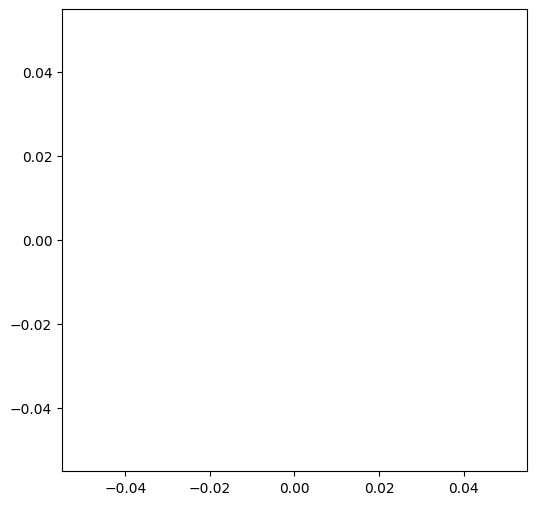

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation



# Fake coordinates: 10 known points and 5 missing
np.random.seed(42)
longitudes = np.random.uniform(30, 40, 15)
latitudes = np.random.uniform(-10, 0, 15)
latitudes[10:] = np.nan  # Simulate missing latitudes

colors = ['blue'] * 10 + ['red'] * 5  # Known = blue, Missing = red

fig, ax = plt.subplots(figsize=(6, 6))
scat = ax.scatter([], [], s=100)

def init():
    ax.set_xlim(29, 41)
    ax.set_ylim(-11, 1)
    ax.set_title("Step 0: Original Data")
    return scat,

def update(frame):
    lat_copy = latitudes.copy()
    if frame > 0:
        # Impute missing with fixed value (e.g., -5 + frame*0.5) to simulate updates
        for i in range(10, 15):
            lat_copy[i] = -5 + frame * 0.5
    coords = np.column_stack((longitudes, lat_copy))
    scat.set_offsets(coords)
    scat.set_color(colors)
    ax.set_title(f"Step {frame}: Imputation Step")
    return scat,

ani = animation.FuncAnimation(fig, update, frames=4, init_func=init, blit=False, repeat=False)

plt.show()
